## PRACTICAL INTRO TO DATA SCIENCE

1. Data Cleaning
2. Analysing
3. Modelling
4. Review

In [39]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [1]:
import pandas as pd
filepath="Global Missing Migrants Dataset.csv"
df=pd.read_csv(filepath)
df.head()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,Incident Type,Incident year,Reported Month,Region of Origin,Region of Incident,Country of Origin,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping
0,Incident,2014,January,Central America,North America,Guatemala,1.0,0,1,0,0,1,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",Northern America
1,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1.0,0,1,0,0,0,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.59713, -111.73756",Northern America
2,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1.0,0,1,0,0,0,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.94026, -113.01125",Northern America
3,Incident,2014,January,Central America,North America,Mexico,1.0,0,1,0,0,1,0,Violence,US-Mexico border crossing,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...","31.506777, -109.315632",Northern America
4,Incident,2014,January,Northern Africa,Europe,Sudan,1.0,0,1,2,0,1,0,Harsh environmental conditions / lack of adequ...,NaN,Border between Russia and Estonia,EUBusiness (Agence France-Presse),"59.1551, 28",Northern Europe


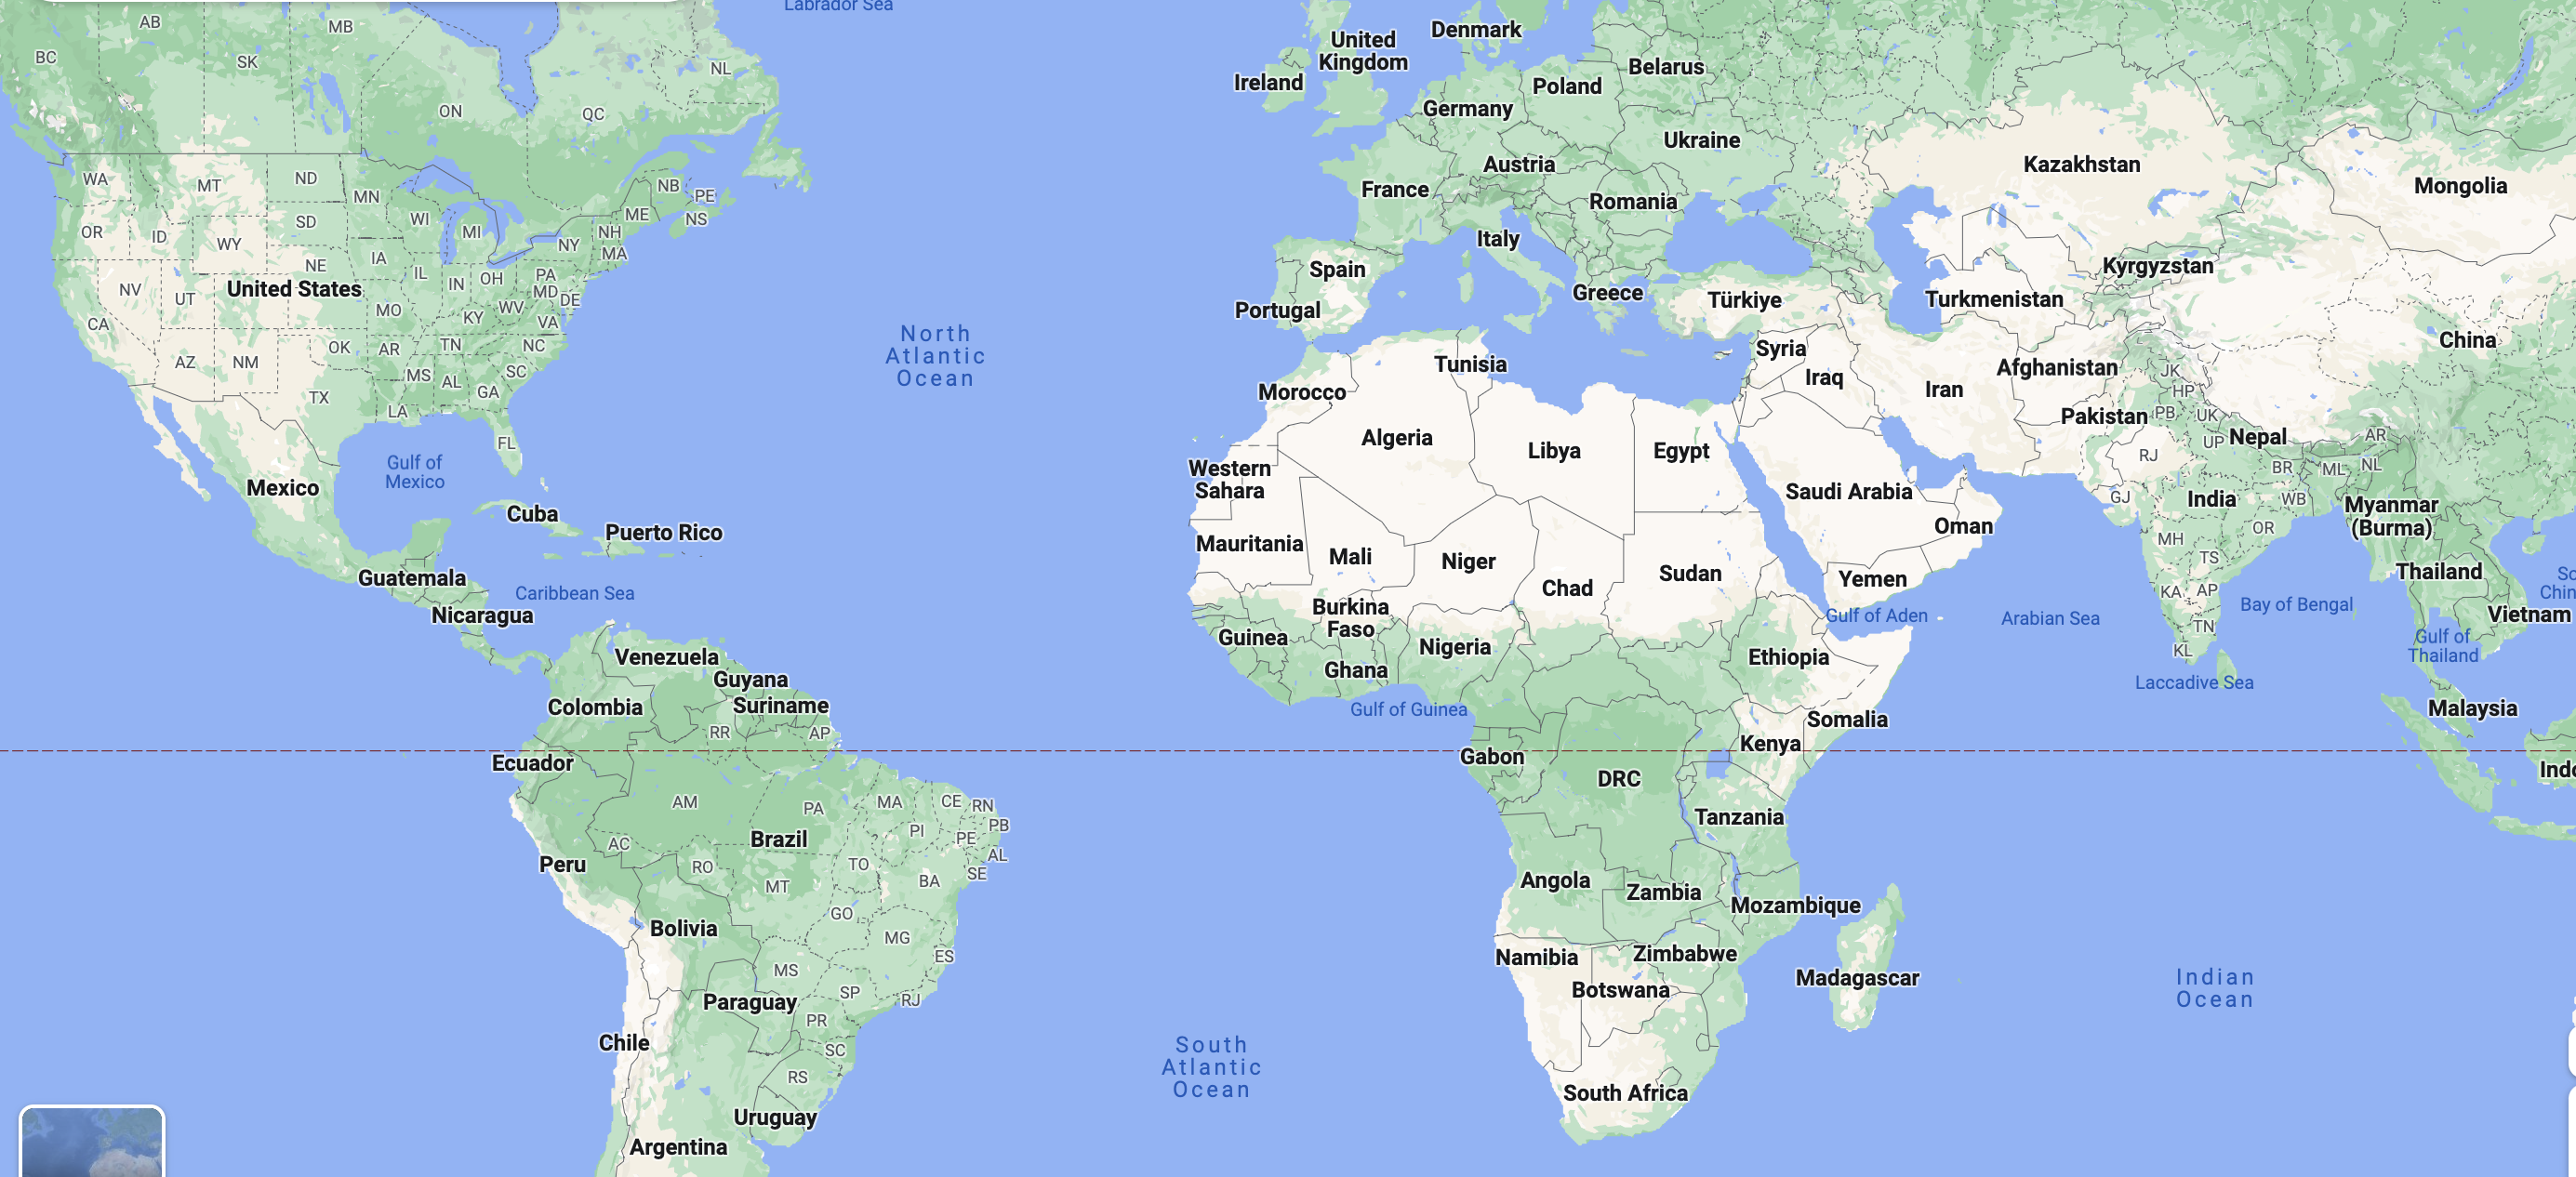

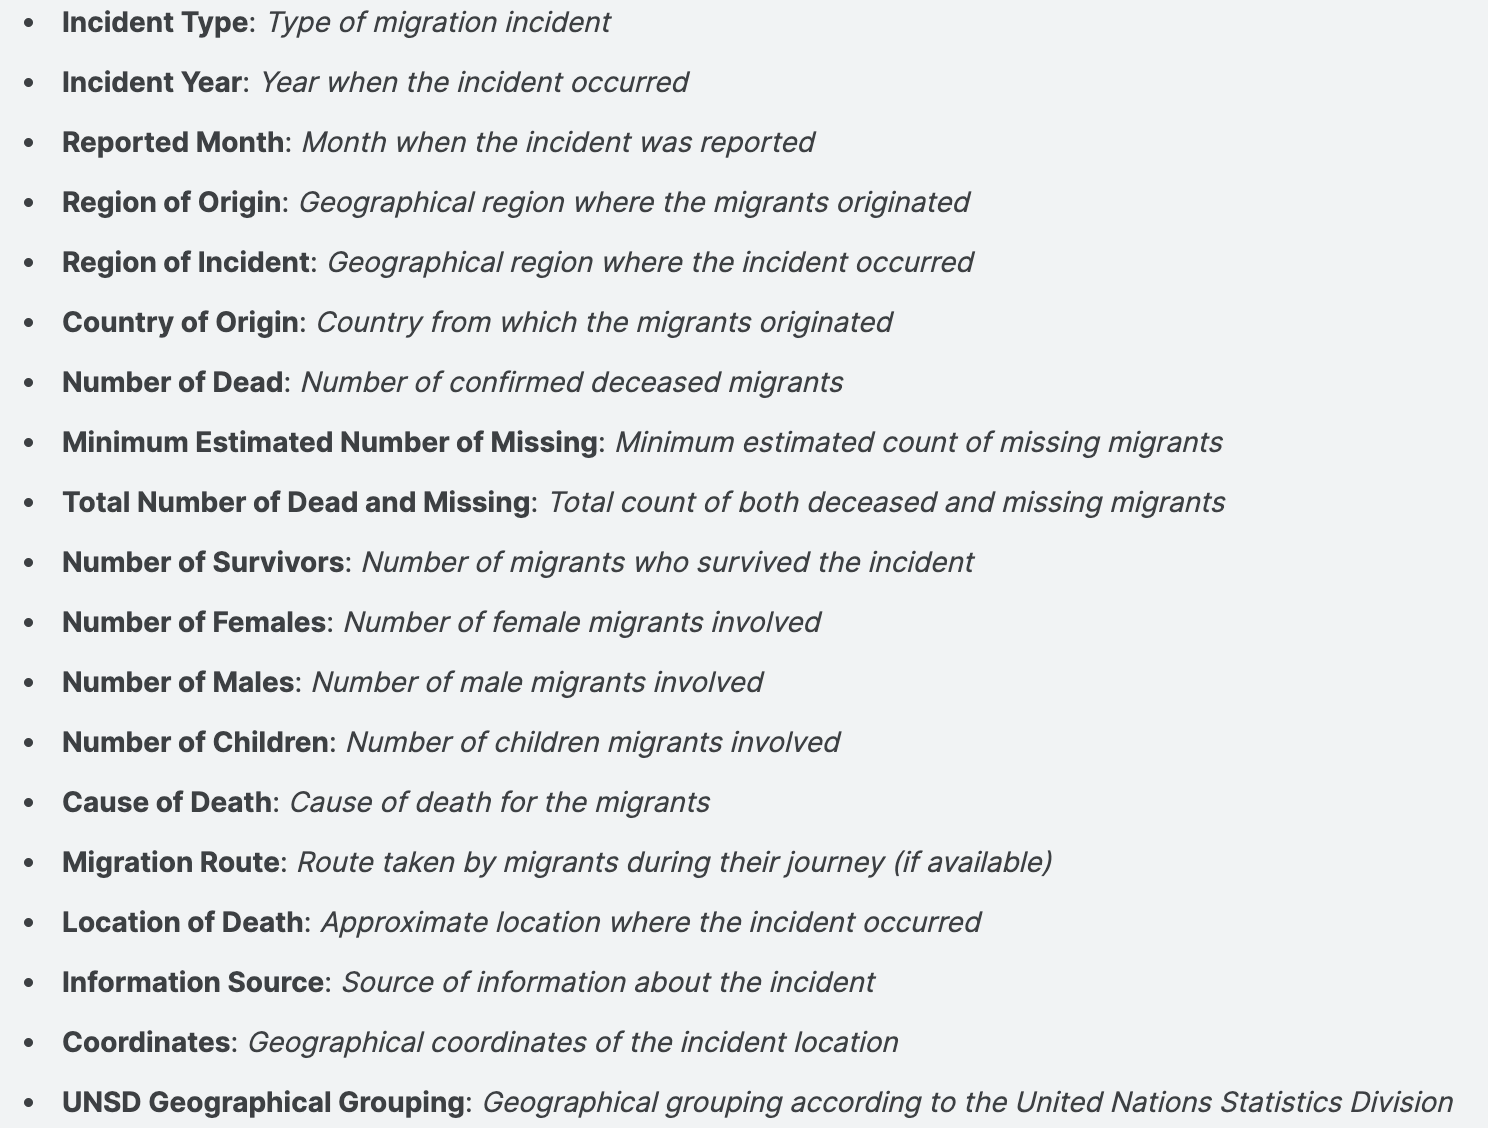

## DATA CLEANING AND PREPROCESSING

1. Which features are categorical and which features are numerical
2. Available datatypes
3. None, blank or empty values

# 1. Which features are categorical and which are numerical

In [2]:
df.info()#if obj: Categorical ___ if float64/int64: Numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13020 entries, 0 to 13019
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Incident Type                        13020 non-null  object 
 1   Incident year                        13020 non-null  int64  
 2   Reported Month                       13020 non-null  object 
 3   Region of Origin                     12998 non-null  object 
 4   Region of Incident                   13020 non-null  object 
 5   Country of Origin                    13012 non-null  object 
 6   Number of Dead                       12470 non-null  float64
 7   Minimum Estimated Number of Missing  13020 non-null  int64  
 8   Total Number of Dead and Missing     13020 non-null  int64  
 9   Number of Survivors                  13020 non-null  int64  
 10  Number of Females                    13020 non-null  int64  
 11  Number of Males             

In [3]:
print("CATEGORICAL VARIABLE")
categorical_variable=df.select_dtypes(include=["object"]).columns
for col in categorical_variable:
    print(col)

CATEGORICAL VARIABLE
Incident Type
Reported Month
Region of Origin
Region of Incident
Country of Origin
Cause of Death
Migration route
Location of death
Information Source
Coordinates
UNSD Geographical Grouping


In [22]:
print("NUMERICAL VARIABLE")
numerical_variable=df.select_dtypes(include=["int64", "float64"] or ["float64"]).columns
for col in numerical_variable:
    print(col)

NUMERICAL VARIABLE
Incident year
Number of Dead
Minimum Estimated Number of Missing
Total Number of Dead and Missing
Number of Survivors
Number of Females
Number of Males
Number of Children


# 2. Available Datatypes

In [23]:
df.dtypes

Incident Type                           object
Incident year                            int64
Reported Month                          object
Region of Origin                        object
Region of Incident                      object
Country of Origin                       object
Number of Dead                         float64
Minimum Estimated Number of Missing      int64
Total Number of Dead and Missing         int64
Number of Survivors                      int64
Number of Females                        int64
Number of Males                          int64
Number of Children                       int64
Cause of Death                          object
Migration route                         object
Location of death                       object
Information Source                      object
Coordinates                             object
UNSD Geographical Grouping              object
dtype: object

# 3. NONE, BLANK or EMPTY VALUES

In [24]:
df.columns

Index(['Incident Type', 'Incident year', 'Reported Month', 'Region of Origin',
       'Region of Incident', 'Country of Origin', 'Number of Dead',
       'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Cause of Death', 'Migration route', 'Location of death',
       'Information Source', 'Coordinates', 'UNSD Geographical Grouping'],
      dtype='object')

In [25]:
for col in df.columns:
    print(col, df[col].isnull().sum())

Incident Type 0
Incident year 0
Reported Month 0
Region of Origin 0
Region of Incident 0
Country of Origin 0
Number of Dead 550
Minimum Estimated Number of Missing 0
Total Number of Dead and Missing 0
Number of Survivors 0
Number of Females 0
Number of Males 0
Number of Children 0
Cause of Death 0
Migration route 0
Location of death 0
Information Source 0
Coordinates 0
UNSD Geographical Grouping 0


In [26]:
for col in df.columns:
    percentage_null_values=str(round((df[col].isnull().sum()/len(df)),4))+"%"
    print(col, percentage_null_values)

Incident Type 0.0%
Incident year 0.0%
Reported Month 0.0%
Region of Origin 0.0%
Region of Incident 0.0%
Country of Origin 0.0%
Number of Dead 0.0422%
Minimum Estimated Number of Missing 0.0%
Total Number of Dead and Missing 0.0%
Number of Survivors 0.0%
Number of Females 0.0%
Number of Males 0.0%
Number of Children 0.0%
Cause of Death 0.0%
Migration route 0.0%
Location of death 0.0%
Information Source 0.0%
Coordinates 0.0%
UNSD Geographical Grouping 0.0%


In [27]:
len(df)

13020

# Approaches to deal with NONE values:
1. Replace None value with the most common value in the column(in case its categorical variable)
2. Remove the values with None values
3. Replace the values with mean(in case its numerical variable)

In [28]:
## HANDLING CATEGORICAL DATA____MODE
for cat_col in categorical_variable:
    df[cat_col]=df[cat_col].fillna(df[cat_col].mode()[0])

In [29]:
for cat_col in categorical_variable:
    print(cat_col, df[cat_col].isnull().sum())

Incident Type 0
Reported Month 0
Region of Origin 0
Region of Incident 0
Country of Origin 0
Cause of Death 0
Migration route 0
Location of death 0
Information Source 0
Coordinates 0
UNSD Geographical Grouping 0


In [30]:
##HANDLING NUMERICAL DATA____MEAN
for num_col in numerical_variable:
    df[num_col]=df[num_col].fillna(df[num_col].mean())

In [31]:
for num_col in numerical_variable:
    print(num_col, df[num_col].isnull().sum())

Incident year 0
Number of Dead 0
Minimum Estimated Number of Missing 0
Total Number of Dead and Missing 0
Number of Survivors 0
Number of Females 0
Number of Males 0
Number of Children 0


## 3. ANALYSIS

1. Data Exploration
2. Feature Engineering
3. Data Visualisation

## 1. DATA EXPLORATION


In [32]:
#The df.describe(include='all') function in pandas provides descriptive statistics for all 
#columns in a DataFrame df, including both numeric and non-numeric columns. 

df.describe(include="all")

,Incident Type,Incident year,Reported Month,Region of Origin,Region of Incident,Country of Origin,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping
count,13020,13020.000000,13020,13020,13020,13020,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020,13020,13020,13020,13020,13020
unique,4,NaN,12,33,16,335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,25,7460,3803,9582,19
top,Incident,NaN,June,Latin America / Caribbean (P),North America,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drowning,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,IOM Afghanistan,"30.96704016, 61.82069052",Northern America
freq,12670,NaN,1269,2186,2706,7228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3313,6413,1061,1546,236,2709
mean,NaN,2019.060753,NaN,NaN,NaN,NaN,2.623737,1.904378,4.417281,6.553763,0.458372,1.116052,0.238095,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.418738,NaN,NaN,NaN,NaN,9.520457,15.645297,19.950630,42.315444,2.853658,3.811134,2.417196,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2014.000000,NaN,NaN,NaN,NaN,0.000000,-2.000000,1.000000,-2.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2017.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2019.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2021.000000,NaN,NaN,NaN,NaN,2.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
##it will give the description of all numerical data
df.describe()

,Incident year,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children
count,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000
mean,2019.060753,2.623737,1.904378,4.417281,6.553763,0.458372,1.116052,0.238095
std,2.418738,9.520457,15.645297,19.950630,42.315444,2.853658,3.811134,2.417196
min,2014.000000,0.000000,-2.000000,1.000000,-2.000000,0.000000,0.000000,0.000000
25%,2017.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,2021.000000,2.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000
max,2023.000000,750.000000,750.000000,1022.000000,1950.000000,94.000000,135.000000,250.000000


In [34]:
!pip install matplotlib

In [36]:
df.describe(include=["O"])

,Incident Type,Reported Month,Region of Origin,Region of Incident,Country of Origin,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping
count,13020,13020,13020,13020,13020,13020,13020,13020,13020,13020,13020
unique,4,12,33,16,335,15,25,7460,3803,9582,19
top,Incident,June,Latin America / Caribbean (P),North America,Unknown,Drowning,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,IOM Afghanistan,"30.96704016, 61.82069052",Northern America
freq,12670,1269,2186,2706,7228,3313,6413,1061,1546,236,2709


Say we want to predict at which month maximum deaths happened.()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
df[""]

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Incident year,13020.0,2019.060753,2.418738,2014.0,2017.0,2019.0,2021.0,2023.0
Number of Dead,13020.0,2.623737,9.520457,0.0,1.0,1.0,2.0,750.0
Minimum Estimated Number of Missing,13020.0,1.904378,15.645297,-2.0,0.0,0.0,0.0,750.0
Total Number of Dead and Missing,13020.0,4.417281,19.950630,1.0,1.0,1.0,2.0,1022.0
Number of Survivors,13020.0,6.553763,42.315444,-2.0,0.0,0.0,0.0,1950.0
Number of Females,13020.0,0.458372,2.853658,0.0,0.0,0.0,0.0,94.0
Number of Males,13020.0,1.116052,3.811134,0.0,0.0,1.0,1.0,135.0
Number of Children,13020.0,0.238095,2.417196,0.0,0.0,0.0,0.0,250.0


In [38]:
df.describe()

,Incident year,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children
count,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000
mean,2019.060753,2.623737,1.904378,4.417281,6.553763,0.458372,1.116052,0.238095
std,2.418738,9.520457,15.645297,19.950630,42.315444,2.853658,3.811134,2.417196
min,2014.000000,0.000000,-2.000000,1.000000,-2.000000,0.000000,0.000000,0.000000
25%,2017.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,2021.000000,2.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000
max,2023.000000,750.000000,750.000000,1022.000000,1950.000000,94.000000,135.000000,250.000000


Text(0.5, 1.0, 'Most people died in which year')

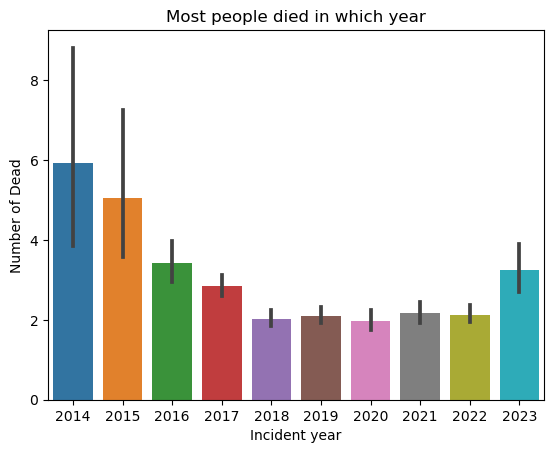

In [40]:
sns.barplot(data=df, x="Incident year", y="Number of Dead")
plt.title("Most people died in which year")

Text(0.5, 1.0, 'Which origin of people died more')

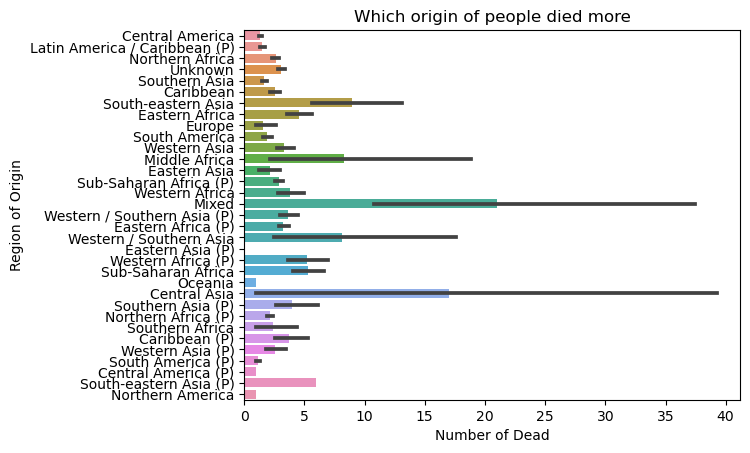

In [42]:
sns.barplot(data=df, x="Number of Dead", y="Region of Origin")
plt.title("Which origin of people died more")

Text(0.5, 1.0, 'Most people died in which region')

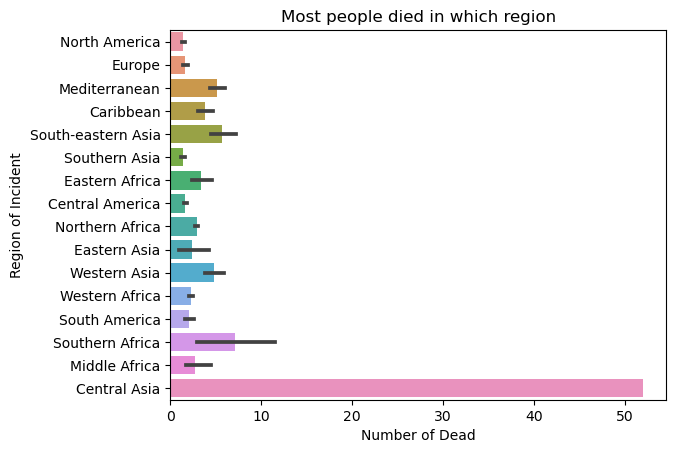

In [43]:
sns.barplot(data=df, x="Number of Dead", y="Region of Incident")
plt.title("Most people died in which region")

Text(0.5, 1.0, 'Most people died due to these Causes')

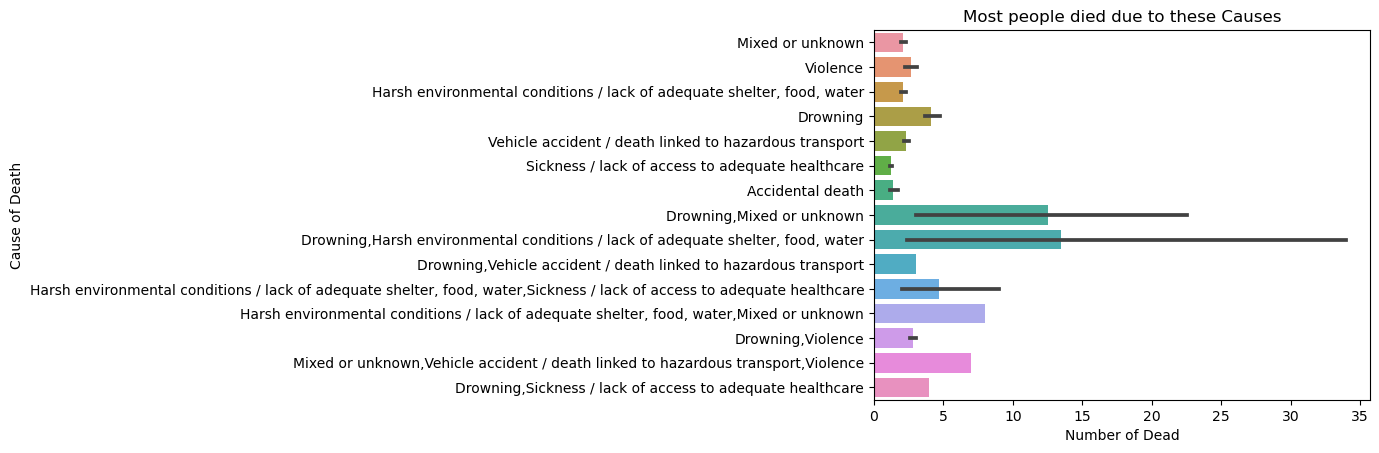

In [45]:
sns.barplot(data=df, x="Number of Dead", y="Cause of Death")
plt.title("Most people died due to these Causes")

Text(0.5, 1.0, 'Number of people survived by year')

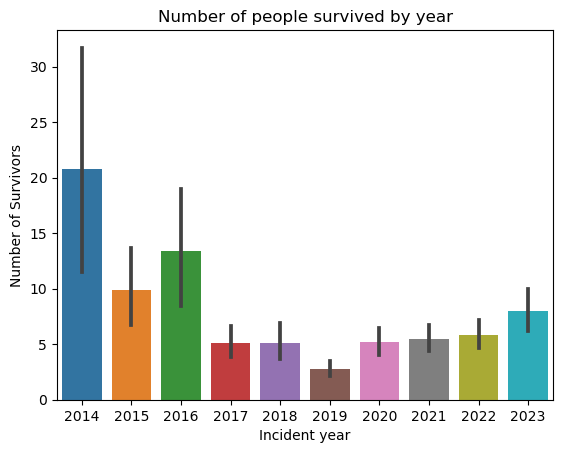

In [46]:
sns.barplot(data=df, x="Incident year", y="Number of Survivors")
plt.title("Number of people survived by year")

In [51]:
print(df.dtypes)

Incident Type                           object
Incident year                            int64
Reported Month                          object
Region of Origin                        object
Region of Incident                      object
Country of Origin                       object
Number of Dead                         float64
Minimum Estimated Number of Missing      int64
Total Number of Dead and Missing         int64
Number of Survivors                      int64
Number of Females                        int64
Number of Males                          int64
Number of Children                       int64
Cause of Death                          object
Migration route                         object
Location of death                       object
Information Source                      object
Coordinates                             object
UNSD Geographical Grouping              object
dtype: object


# GENDER DISTRIBUTION

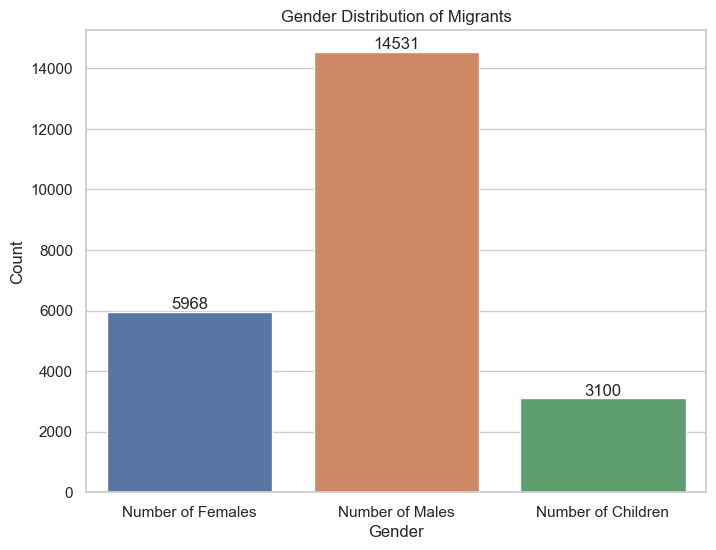

In [56]:
gender_counts = df[['Number of Females', 'Number of Males', 'Number of Children']].sum()

# Create a DataFrame for plotting
gender_data = pd.DataFrame({
    'Gender': gender_counts.index,
    'Count': gender_counts.values
})

# Set the style
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Gender', y='Count', data=gender_data)
for bars in ax.containers:
    ax.bar_label(bars)

# Add title and labels
plt.title("Gender Distribution of Migrants")
plt.xlabel("Gender")
plt.ylabel("Count")

# Show the plot
plt.show()

# TIME BASED ANALYSIS

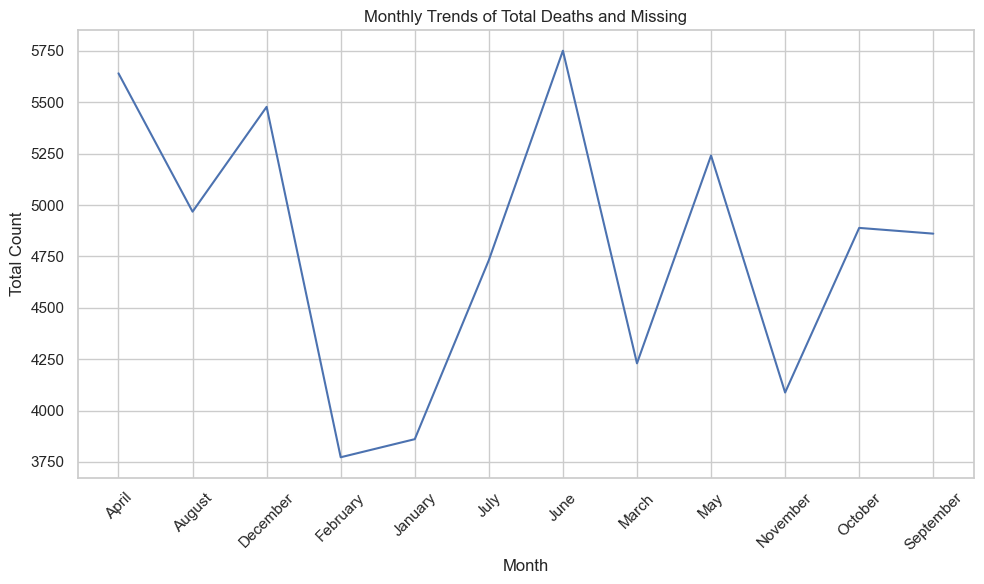

In [57]:
#Aggregate the 'Total Number of Dead and Missing' by grouping according to the 'Reported Month'
monthly_trends =df.groupby('Reported Month')['Total Number of Dead and Missing'].sum().reset_index()

sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))#Creatin a file using Seaborn
sns.lineplot(data=monthly_trends, x='Reported Month', y='Total Number of Dead and Missing')


plt.title('Monthly Trends of Total Deaths and Missing')
plt.xlabel('Month')
plt.ylabel('Total Count')# Adding title and labels

# representing the plot
plt.xticks(rotation=45)  # Rotate x-axis labels so taht all can accomodate
plt.tight_layout()       
plt.show()